# Decorator 패턴

## D.1 소개

* Decorator 패턴 (Structral Design Pattern)
* "내 안에 너 있다."
    * 2004년 드라마 '파리의 연인'에서 당시 유명했던 남자배우가 고백을 하는 대사. "It's you who is in my heart..."
    * Decorator는 "It's a super class who is in a child decorator"로 이해할 수 있다.
    * 같은 부모를 가진 다른 객체를 생성자에 포함하여 기능을 사용하는 패턴이다.
* GoF '상속'으로 기능을 확장하지 않고, 기능을 동적으로 추가하는 패턴이다 "Attach additional responsibilities to an object dynamically. Decorators provide a flexible alternative to subclassing for extending functionality."

* 디자인패턴 요소

요소 | 설명
---|---
name | Decorator
problem | 조금씩 다른 다양한 종류. 늘어날수록 확장 어려움.
solution | 상속을 사용하지 않고 연관으로 필요한 기능 추가. 실행시점 확장 Extension at runtime (not compile time)
consequence | 확장성

* 사례
    * 윈도우를 꾸미는 사례로 윈도우에 borders, scrollbars, menubars를 추가할 수 있다 (see 'Wikipedia' for a java implementation)
    * Java의 파일 입출력에서 Decorator 패턴을 사용한다 (java.io package)
    * 음악audio waves에 여러 효과effects를 넣는 경우 사용할 수 있다 (flanger, wah-wah 등)
    * 여러 나라의 통화 Currency의 문제.
* 프로그래밍 과제
    * case extension - 프로그래밍 'Beverage' CaramelMacchiato (HFDP Ch3)
    * new case - BufferedReader로 대문자 변환 (HFDP Ch3)

## D.2 문제

* 조금씩 기능을 추가하기 위해 새로운 클래스를 생성하는 경우
* 상속으로 문제를 풀면, 너무 많은 상속관계가 발생할 수 있다.
    * '음료'를 만드는데, 상속을 사용 (p.82)
    * 음료에 필요한 것을 추가 (우유, 두유, 휘핑크림, 모카...)
    * 클래스가 너무 많아지는 문제class explosion
* 상속을 사용하지 않고 새로운 기능을 추가할 수 있을까?

In [1]:
import iplantuml

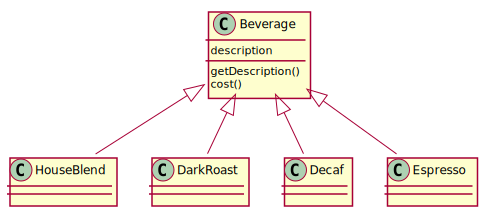

In [2]:
%%plantuml
@startuml
class Beverage {
    description
    getDescription()
    cost()
}
Beverage <|-- HouseBlend
Beverage <|-- DarkRoast
Beverage <|-- Decaf
Beverage <|-- Espresso
@enduml

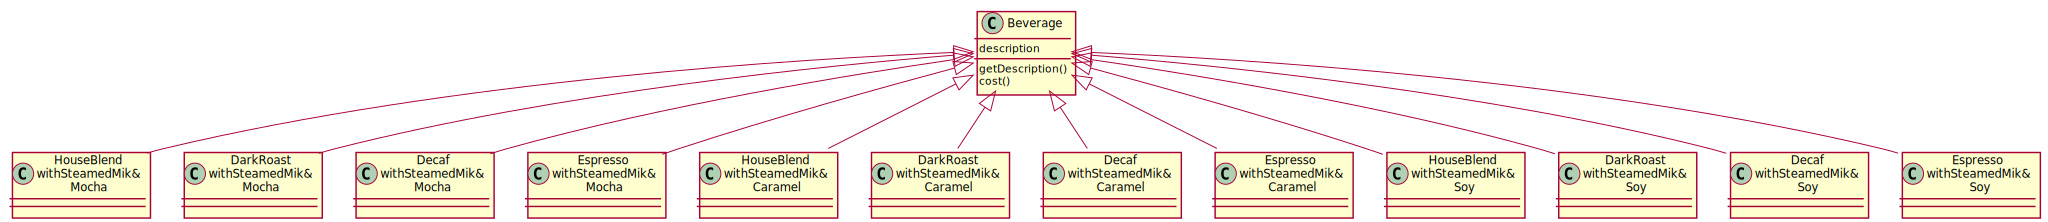

In [3]:
%%plantuml
@startuml
class Beverage {
    description
    getDescription()
    cost()
}
Beverage <|-- "HouseBlend\nwithSteamedMik&\nMocha"
Beverage <|-- "DarkRoast\nwithSteamedMik&\nMocha"
Beverage <|-- "Decaf\nwithSteamedMik&\nMocha"
Beverage <|-- "Espresso\nwithSteamedMik&\nMocha"
Beverage <|-- "HouseBlend\nwithSteamedMik&\nCaramel"
Beverage <|-- "DarkRoast\nwithSteamedMik&\nCaramel"
Beverage <|-- "Decaf\nwithSteamedMik&\nCaramel"
Beverage <|-- "Espresso\nwithSteamedMik&\nCaramel"
Beverage <|-- "HouseBlend\nwithSteamedMik&\nSoy"
Beverage <|-- "DarkRoast\nwithSteamedMik&\nSoy"
Beverage <|-- "Decaf\nwithSteamedMik&\nSoy"
Beverage <|-- "Espresso\nwithSteamedMik&\nSoy"
@enduml

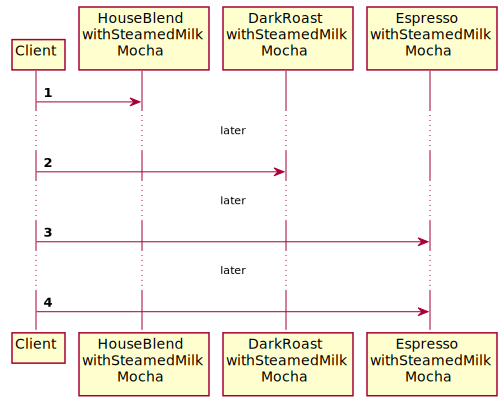

In [4]:
%%plantuml

@startuml

autonumber
Client -> "HouseBlend\nwithSteamedMilk\nMocha"
... later ...
Client -> "DarkRoast\nwithSteamedMilk\nMocha"
... later ...
Client -> "Espresso\nwithSteamedMilk\nMocha"
... later ...
Client -> "Espresso\nwithSteamedMilk\nMocha"

@enduml

## D.3 설계

* OCP(Open Closed Principle)
* 추가하려는 기능이 있는 경우 확장이 쉽고 (Open)
* 기존 소스코드는 직접 수정을 하지 않도록 (Closed)
* DarkRoast를 주문하는 경우,
    * 모카를 원하면 추가 (decorating DarkRoast), 비용 추가
    * 휘핑크림을 원하면 또 추가 (decorating again), 비용 추가
* Component
    * 기본이 되는 클래스
    * 다른 기능이 필요한 경우 여기서 상속을 받음.
    * 인터페이스 또는 추상클래스로 구현할 수 있슴.
* Decorator
    * Component에 대해 HAS-A관계 (속성에 Component 참조)
    * 또한 Component에 대해 상속관계
    * Component와 동일한 기능 (상속관계를 갖으므로), 그러나 필요한 것은 추가 (HAS-A 관계를 통해)


* Component 클래스를 만든다.
* Decorator 클래스를 Component 클래스의 하위클래스로 한다.

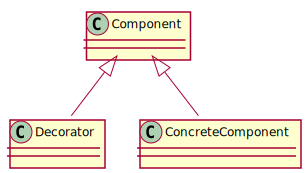

In [3]:
%%plantuml
@startuml
class Component
class Decorator
Component <|-- ConcreteComponent
Component <|-- Decorator
@enduml

* Decorator 클래스의 생성자에 Component를 인자로 넣는다.

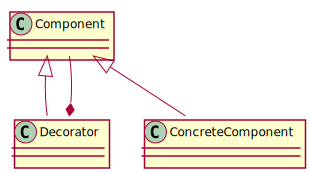

In [4]:
%%plantuml
@startuml
class Component
class Decorator
Component <|-- ConcreteComponent
Component <|-- Decorator
Component --* Decorator
@enduml

* ConcreteDecorator가 Component 클래스의 함수를 재정의한다 (override)
* 부모 생성자 'Decorator(Component)'는 'ConcreteDecorator'에 상속되지 않느다.
    * 생성자는 자신을 생성하는 특별한 기능을 가지고 있기 때문에, 상속되지 않는다.
    * Java Language specification, 8.8. Constructor Declarations을 참조
"Constructor declarations are not members. They are never inherited and therefore are not subject to hiding or overriding."

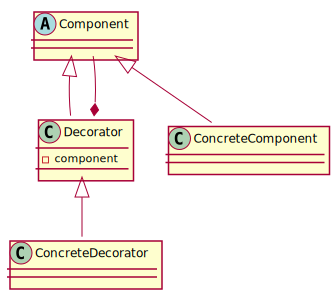

In [5]:
%%plantuml
@startuml
abstract class Component
class Decorator {
    -component
}
Component <|-- ConcreteComponent
Component <|-- Decorator
Component --* Decorator
Decorator <|-- ConcreteDecorator

@enduml

## D.4 Case Implementation

* 조금씩 다른 기능을 추가하는 경우, 상속보다는 연관으로 확장성
* Beverage case (6.1)
* Windows case (6.2)
* java.io (6.3)

### D.4.1 Beverage

* 교재 HFDP Ch3 'Beverage'
    * OCP설계원칙에 따라
    * Beverage 추상클래스, 하위 concrete beverages
    * 추가를 위해 Decorator 클래스
    * condiments는 Decorator의 concrete subclasses

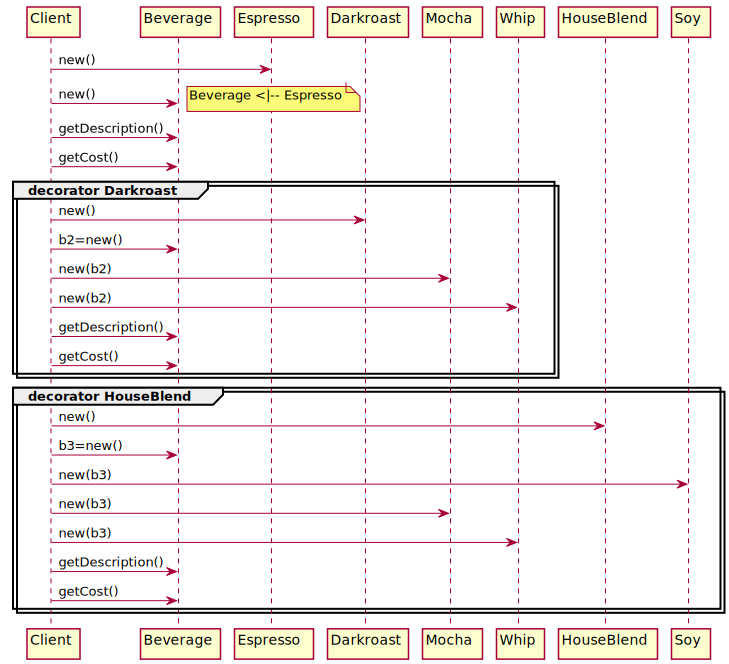

In [6]:
%%plantuml

@startuml

participant Client
participant Beverage

Client -> Espresso:new()
Client -> Beverage:new()
note right: Beverage <|-- Espresso
Client -> Beverage:getDescription()
Client -> Beverage:getCost()

group decorator Darkroast
Client -> Darkroast:new()
Client -> Beverage:b2=new()
Client -> Mocha:new(b2)
Client -> Whip:new(b2)
Client -> Beverage:getDescription()
Client -> Beverage:getCost()
end group

group decorator HouseBlend
Client -> HouseBlend:new()
Client -> Beverage:b3=new()
Client -> Soy:new(b3)
Client -> Mocha:new(b3)
Client -> Whip:new(b3)
Client -> Beverage:getDescription()
Client -> Beverage:getCost()
end group

@enduml

* Mik(Beverage)는 부모 생성자 'CondimentDecorator(Component)'를 상속받아 구현하지 않는다.

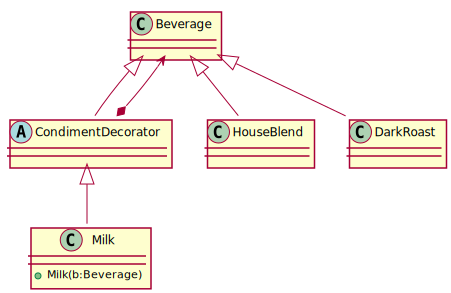

In [9]:
%%plantuml

@startuml

abstract class CondimentDecorator
Beverage <|-- HouseBlend
Beverage <|-- DarkRoast
Beverage <|-- CondimentDecorator
Beverage <--* CondimentDecorator
CondimentDecorator <|-- Milk
class Milk {
    +Milk(b:Beverage)
}

@enduml

In [ ]:
# %load ./src/headfirst/decorator/starbuzz/Beverage.java
package headfirst.decorator.starbuzz;

public abstract class Beverage {
	String description = "Unknown Beverage";
  
	public String getDescription() {
		return description;
	}
 
	public abstract double cost();
}


In [ ]:
# %load ./src/headfirst/decorator/starbuzz/CondimentDecorator.java
package headfirst.decorator.starbuzz;

public abstract class CondimentDecorator extends Beverage {
	public abstract String getDescription();
}


In [ ]:
# %load /Users/media/Code/git/sd/src/headfirst/decorator/starbuzz/StarbuzzCoffee.java
package headfirst.decorator.starbuzz;

public class StarbuzzCoffee {
 
	public static void main(String args[]) {
		Beverage beverage = new Espresso();
		System.out.println(beverage.getDescription() 
				+ " $" + beverage.cost());
 
		Beverage beverage2 = new DarkRoast();
		beverage2 = new Mocha(beverage2);
		beverage2 = new Mocha(beverage2);
		beverage2 = new Whip(beverage2);
		System.out.println(beverage2.getDescription() 
				+ " $" + beverage2.cost());
 
		Beverage beverage3 = new HouseBlend();
		beverage3 = new Soy(beverage3);
		beverage3 = new Mocha(beverage3);
		beverage3 = new Whip(beverage3);
		System.out.println(beverage3.getDescription() 
				+ " $" + beverage3.cost());
	}
}


In [ ]:
# %load /Users/media/Code/git/sd/src/headfirst/decorator/starbuzz/Espresso.java
package headfirst.decorator.starbuzz;

public class Espresso extends Beverage {
  
	public Espresso() {
		description = "Espresso";
	}
  
	public double cost() {
		return 1.99;
	}
}


In [ ]:
# %load /Users/media/Code/git/sd/src/headfirst/decorator/starbuzz/DarkRoast.java
package headfirst.decorator.starbuzz;

public class DarkRoast extends Beverage {
	public DarkRoast() {
		description = "Dark Roast Coffee";
	}
 
	public double cost() {
		return .99;
	}
}



In [ ]:
# %load /Users/media/Code/git/sd/src/headfirst/decorator/starbuzz/Mocha.java
package headfirst.decorator.starbuzz;

public class Mocha extends CondimentDecorator {
	Beverage beverage;
 
	public Mocha(Beverage beverage) {
		this.beverage = beverage;
	}
 
	public String getDescription() {
		return beverage.getDescription() + ", Mocha";
	}
 
	public double cost() {
		return .20 + beverage.cost();
	}
}


In [ ]:
# %load /Users/media/Code/git/sd/src/headfirst/decorator/starbuzz/Whip.java
package headfirst.decorator.starbuzz;
 
public class Whip extends CondimentDecorator {
	Beverage beverage;
 
	public Whip(Beverage beverage) {
		this.beverage = beverage;
	}
 
	public String getDescription() {
		return beverage.getDescription() + ", Whip";
	}
 
	public double cost() {
		return .10 + beverage.cost();
	}
}


In [ ]:
# %load /Users/media/Code/git/sd/src/headfirst/decorator/starbuzz/HouseBlend.java
package headfirst.decorator.starbuzz;

public class HouseBlend extends Beverage {
	public HouseBlend() {
		description = "House Blend Coffee";
	}
 
	public double cost() {
		return .89;
	}
}



In [ ]:
# %load /Users/media/Code/git/sd/src/headfirst/decorator/starbuzz/Soy.java
package headfirst.decorator.starbuzz;

public class Soy extends CondimentDecorator {
	Beverage beverage;

	public Soy(Beverage beverage) {
		this.beverage = beverage;
	}

	public String getDescription() {
		return beverage.getDescription() + ", Soy";
	}

	public double cost() {
		return .15 + beverage.cost();
	}
}


In [12]:
!javac -d classes/ -sourcepath src/ src/headfirst/decorator/starbuzz/StarbuzzCoffee.java
!javac -d classes/ -sourcepath src/ src/headfirst/decorator/starbuzz/Espresso.java
!javac -d classes/ -sourcepath src/ src/headfirst/decorator/starbuzz/DarkRoast.java 
!javac -d classes/ -sourcepath src/ src/headfirst/decorator/starbuzz/Mocha.java 
!javac -d classes/ -sourcepath src/ src/headfirst/decorator/starbuzz/Whip.java 
!javac -d classes/ -sourcepath src/ src/headfirst/decorator/starbuzz/HouseBlend.java 
!javac -d classes/ -sourcepath src/ src/headfirst/decorator/starbuzz/Soy.java 
!java -cp classes/ headfirst.decorator.starbuzz.StarbuzzCoffee

Picked up JAVA_TOOL_OPTIONS: -javaagent:/usr/share/java/jayatanaag.jar 
Picked up JAVA_TOOL_OPTIONS: -javaagent:/usr/share/java/jayatanaag.jar 
Picked up JAVA_TOOL_OPTIONS: -javaagent:/usr/share/java/jayatanaag.jar 
Picked up JAVA_TOOL_OPTIONS: -javaagent:/usr/share/java/jayatanaag.jar 
Picked up JAVA_TOOL_OPTIONS: -javaagent:/usr/share/java/jayatanaag.jar 
Picked up JAVA_TOOL_OPTIONS: -javaagent:/usr/share/java/jayatanaag.jar 
Picked up JAVA_TOOL_OPTIONS: -javaagent:/usr/share/java/jayatanaag.jar 
Picked up JAVA_TOOL_OPTIONS: -javaagent:/usr/share/java/jayatanaag.jar 
Espresso $1.99
Dark Roast Coffee, Mocha, Mocha, Whip $1.49
House Blend Coffee, Soy, Mocha, Whip $1.34


* 출력결과
    * Espresso $1.99
    
    * Dark Roast Coffee, Mocha, Mocha, Whip $1.49
    
    * House Blend Coffee, Soy, Mocha, Whip $1.34

### D.4.2 Windows

* Decorator pattern 위키피디아 https://en.wikipedia.org/wiki/Decorator_pattern

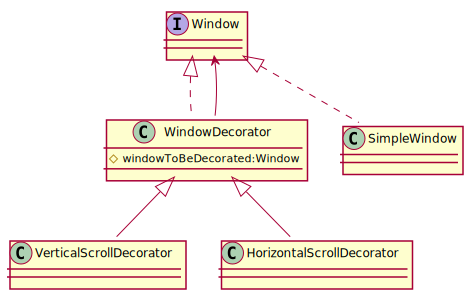

In [13]:
%%plantuml

@startuml
interface Window
class WindowDecorator {
    #windowToBeDecorated:Window
}
Window <|.. SimpleWindow
Window <|.. WindowDecorator
Window <-- WindowDecorator
WindowDecorator <|-- VerticalScrollDecorator
WindowDecorator <|-- HorizontalScrollDecorator
@enduml

In [ ]:
# %load ./src/headfirst/decorator/windows/DecoratedWindowTest.java
/*
    @author: wiki
    @version:v20150929
    javac -d classes/ -sourcepath src/ src/headfirst/decorator/windows/*.java
    java -cp classes/ headfirst.decorator.windows.DecoratedWindowTest 
*/
package headfirst.decorator.windows;
public class DecoratedWindowTest {
    public static void main(String[] args) {
        // Create a decorated Window with horizontal and vertical scrollbars
        Window decoratedWindow = new HorizontalScrollBarDecorator (
                new VerticalScrollBarDecorator (new SimpleWindow()));

        // Print the Window's description
        System.out.println(decoratedWindow.getDescription());
    }
}



In [ ]:
# %load ./src/headfirst/decorator/windows/Window.java
package headfirst.decorator.windows;

public interface Window {
    public void draw(); // Draws the Window
    public String getDescription(); // Returns a description of the Window
}



In [ ]:
# %load ./src/headfirst/decorator/windows/WindowDecorator.java
package headfirst.decorator.windows;
// abstract decorator class - note that it implements Window
public abstract class WindowDecorator implements Window {
    protected Window windowToBeDecorated; // the Window being decorated

    public WindowDecorator (Window windowToBeDecorated) {
        this.windowToBeDecorated = windowToBeDecorated;
    }
    public void draw() {
        windowToBeDecorated.draw(); //Delegation
    }
    public String getDescription() {
        return windowToBeDecorated.getDescription(); //Delegation
    }
}



In [ ]:
# %load ./src/headfirst/decorator/windows/SimpleWindow.java
package headfirst.decorator.windows;
// Extension of a simple Window without any scrollbars
public class SimpleWindow implements Window {
    public void draw() {
        // Draw window
    }
    public String getDescription() {
        return "simple window";
    }
}



In [ ]:
# %load ./src/headfirst/decorator/windows/HorizontalScrollBarDecorator.java
package headfirst.decorator.windows;
// The second concrete decorator which adds horizontal scrollbar functionality
public class HorizontalScrollBarDecorator extends WindowDecorator {
    public HorizontalScrollBarDecorator (Window windowToBeDecorated) {
        super(windowToBeDecorated);
    }
    @Override
    public void draw() {
        super.draw();
        drawHorizontalScrollBar();
    }
    private void drawHorizontalScrollBar() {
        // Draw the horizontal scrollbar
    }
    @Override
    public String getDescription() {
        return super.getDescription() + ", including horizontal scrollbars";
    }
}



In [ ]:
# %load ./src/headfirst/decorator/windows/VerticalScrollBarDecorator.java
package headfirst.decorator.windows;
// The first concrete decorator which adds vertical scrollbar functionality
public class VerticalScrollBarDecorator extends WindowDecorator {
    public VerticalScrollBarDecorator (Window windowToBeDecorated) {
        super(windowToBeDecorated);
    }
    @Override
    public void draw() {
        super.draw();
        drawVerticalScrollBar();
    }
    private void drawVerticalScrollBar() {
        // Draw the vertical scrollbar
    }
    @Override
    public String getDescription() {
        return super.getDescription() + ", including vertical scrollbars";
    }
}



In [20]:
%pwd

u'/home/jsl/Code/git/bb/sd'

In [21]:
# change to the root directory
!javac -d classes/ -sourcepath src/ src/headfirst/decorator/windows/*.java
!java -cp classes/ headfirst.decorator.windows.DecoratedWindowTest

Picked up JAVA_TOOL_OPTIONS: -javaagent:/usr/share/java/jayatanaag.jar 
Picked up JAVA_TOOL_OPTIONS: -javaagent:/usr/share/java/jayatanaag.jar 
simple window, including vertical scrollbars, including horizontal scrollbars


### D.4.3 java.io

* 자바의 입출력은 io 패키지에서 처리하고, 다음 4개의 클래스를 중심으로, decorator 패턴을 사용한다.
* 이들은 추상클래스라서 직접 사용할 수 없다는 점을 유의한다.

구분 | 입력 | 출력
-----|-----|-----
바이트 | InputStream | OutputStream
문자 | Reader | Writer

* 예를 들어, BufferedReader의 경우 생성자에 다른 객체 InputStream를 포함하여 가지고 있다.
```
String line = (new BufferedReader(new InputStreamReader(System.in))).readLine();
```


* 입출력 중 '입력'의 상속 계층을 살펴 보자.
    * 1계층 InputStream
        * 2계층 FileInputStream은 Sytem File에서 읽어옴 (1회에 1 바이트 씩)
        * 3계층 BufferedInputStream은 InputStream에서 읽어오고, Buffer를 이용하기 때문에 빠름.
```
BufferedInputStream bis =
    new BufferedInputStream(new FileInputStream(new File('README.md'));
```

    * 1계층 Reader
        * 2계층 InputStreamReader, BufferedReader
        * 3계층 FileReader
            * 1회에 2 바이트 씩 - 문자가 2 바이트이므로
            * 문자 파일을 읽을 경우 사용
            * default encoding방식으로 텍스트 파일을 읽음
```
BufferedReader br = new BufferedReader(new FileReader(new File('README.md')));
```

* 한글
    * default encoding이 'unicode'가 아닌 경우, 깨질 수 있다.
    * InputStreamReader: byte streams --> character streams
```
FileInputStream fis = new FileInputStream("test.txt");
InputStreamReader isr = new InputStreamReader(fis, "UTF8");
BufferedReader br = new BufferedReader(isr);
```

    * OutputStreamWriter: character streams --> byte streams
```
FileOutputStream fos = new FileOutputStream("test.txt");
Writer out = new OutputStreamWriter(fos, "UTF8");
```

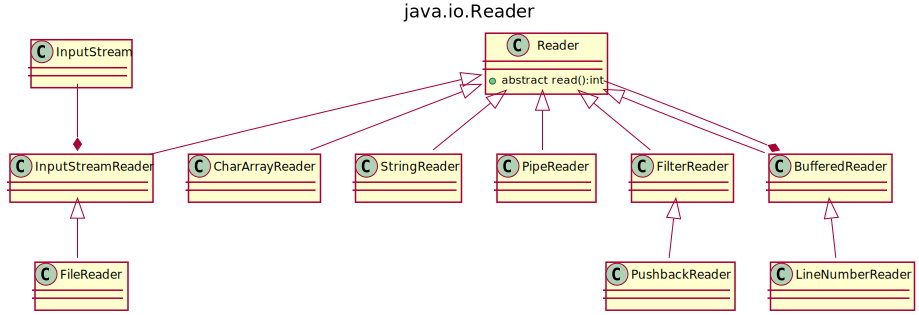

In [9]:
%%plantuml
@startuml
title java.io.Reader
class Reader {
  +abstract read():int
}
Reader <|-- InputStreamReader
Reader <|-- CharArrayReader
Reader <|-- StringReader
Reader <|-- PipeReader
Reader <|-- FilterReader
Reader <|-- BufferedReader
InputStreamReader <|-- FileReader
FilterReader <|-- PushbackReader
BufferedReader <|-- LineNumberReader
BufferedReader *-- Reader
InputStreamReader *-up- InputStream
@enduml

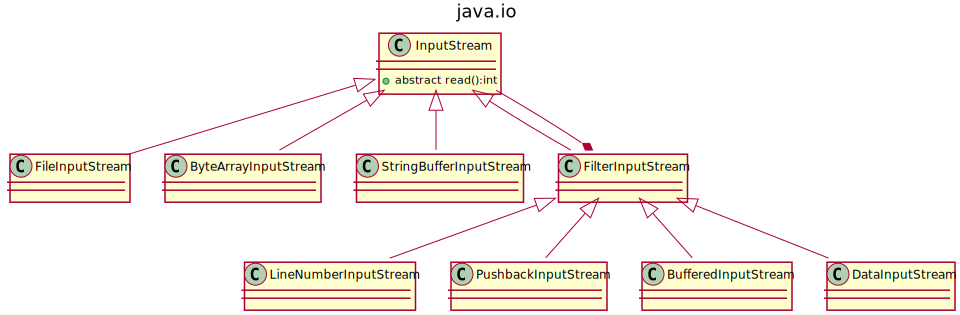

In [4]:
%%plantuml
@startuml
title java.io.InputStream
class InputStream {
  +abstract read():int
}
InputStream <|-- FileInputStream
InputStream <|-- ByteArrayInputStream
InputStream <|-- StringBufferInputStream
InputStream <|-- FilterInputStream
FilterInputStream *-- InputStream
FilterInputStream <|-- LineNumberInputStream
FilterInputStream <|-- PushbackInputStream
FilterInputStream <|-- BufferedInputStream
FilterInputStream <|-- DataInputStream
@enduml

* File 객체에 필요한 Pathname 환경
    * System property를 사용해서 디렉토리 설정 읽기

Property 키 | 설명 | 예
----------|----------|----------
"file.separator" | 리눅스 "/" 또는 윈도우 "\" | /
"java.class.path" | classpath | "/home/js/Code/lib/drjava-stable-20140826-r5761.jar"
"java.home" | Java Runtime Environment (JRE) 설치 경로 | "/usr/lib/jvm/java-8-openjdk-amd64/jre"
"line.separator" | 텍스트 파일의 줄 바꿈 구분자
"os.name" | 운영체제 명 | Linux
"path.separator" | classpath의 구분자 리눅스 ':' 또는 윈도우 ';'
"user.dir" | user의 작업 디렉토리 | /home/js
"user.home" | user의 home 디렉토리 | /home/js


```
> import java.io.File;
> System.getProperty("user.home");
"/Users/media"
> File myhome=new File(System.getProperty("user.home")); pathname은 디렉토리, 파일이 모두 가능하다.
> String cwd=new java.io.File( "." ).getCanonicalPath(); 유일한 절대경로 (절대경로는 symlink등 여러 값을 가질 수 있다)
> cwd
"/Users/media/Code/git/sd"
```

* 참고: static 함수 genenv를 사용하여 환경변수를 읽어 올 수 있다.
* System property는 JVM, genenv는 운영체제 변수라는 차이가 있다.

```
> System.getenv(); 전체를 읽을 경우
> System.getenv("PATH"); 'PATH'만 읽을 경우
```

* File 객체
    * java.io.File의 생성자는 File 객체 또는 String 모두 사용할 수 있다.
    * java.io.File은 파일이고, 다른 언어와 달리 읽을 수 없다 (read() 함수가 없다).
    읽으려면 inputstream, reader를 사용한다.
    * File 객체의 pathname은 디렉토리 또는 파일명 모두 가능한다.
    * 파일 명을 만들 때, 폴더 구분자에 주의한다.
    * 윈도우 폴더 구분자는 back slash 2개를 겹쳐 쓴다 '\\\'
```
> String readmePath0 = "C:\\user\\data\\README.md";
> File readme1 = new File(readme1Path0);
```

    * 리눅스 폴더 구분자는 forward slash를 사용한다 '/'
```
> File readme=new File(cwd,"README.md")
> readme
/Users/media/Code/git/sd/README.md
```

* 파일에서 읽기
    * FileInputStream
```
> import java.io.FileInputStream
> FileInputStream isReadme=new FileInputStream(readme)
> isReadme.read()
35
> (char)35
'#'
```

    * BufferedInputStream
```      
> import java.io.BufferedInputStream
> BufferedInputStream bis=new BufferedInputStream(isReadme)
> bis.read()
101
> (char)101
'e'
```

    * abstract InputStream
```
> import java.io.InputStream
> InputStream is=new BufferedInputStream(isReadme)
> is.read()
```

    * FileReader
```
> import java.io.FileReader;
> FileReader fr =new FileReader(readme);
> BufferedReader br =new BufferedReader(fr);
> br.readLine()
"# 자바"
> import java.io.FileWriter;
> import java.io.PrintWriter;
> PrintWriter out=new PrintWriter(new FileWriter("hello.txt"))
> out.printf("Hello %s", "jsl");
> out.close()
```

In [ ]:
# %load /Users/media/Code/git/sd/src/com/sd/myFile/FileDemoMain.java
/*
 * @author jsl
 * @since 160404
 * demo how to use file decorator
 */

package com.sd.myFile;

import java.io.FileInputStream;
import java.io.InputStream;
import java.io.InputStreamReader;
import java.io.BufferedReader;;
import java.io.Reader;
import java.io.File;

public class FileDemoMain {
    public static void main(String[] args) throws Exception {
        File readme=null;
        InputStream isReadme = null;
        InputStreamReader isrReadme = null;
        BufferedReader brReadme=null;
        int i;
        char c;
        String str;
        StringBuffer sbuffer = new StringBuffer();
      
        try{
            // new input stream created
            File myhome=new File(System.getProperty("user.home"));
            System.out.println("myhome is "+myhome);

            String cwd=new File( "." ).getCanonicalPath();
            System.out.println("current working dir is "+cwd);

            readme=new File(cwd,"README.md");
            System.out.println("readme file is "+readme);

            isReadme=new FileInputStream(readme);
            System.out.println("Characters printed:");
            while((i=isReadme.read())!=-1) {
                c=(char)i;
                System.out.print(c);
            }
        }catch(Exception e){
            e.printStackTrace();
        }finally{
            if(isReadme != null)
                isReadme.close();
        }

        try{
            isReadme=new FileInputStream(readme);
            isrReadme=new InputStreamReader(isReadme,"UTF8");
            brReadme= new BufferedReader(isrReadme);
            /*while((i=brReadme.read())!=-1) {
                c=(char)i;
                //System.out.println(c);
                sbuffer.append(c);
            }
            System.out.println("--"+sbuffer.toString());*/
            while((str=brReadme.readLine())!=null) {
                System.out.println("--"+str);
            }
        }catch(Exception e){
            e.printStackTrace();
        }finally{
            if(brReadme != null)
                brReadme.close();
        }
    }
}

